In [1]:
import Bio.SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import scipy.stats as sps

In [2]:
seq = list(Bio.SeqIO.parse("salmonella-enterica/salmonella-enterica.reads.fna","fasta"))

In [3]:
def get_data(k):
    seq_dict = {}
    l = len(str(seq[0].seq))

    #every sequence, count str with length k in them. Made a dict
    for j in tqdm(range(len(seq))): 
        i = 0
        seq_ = str(seq[j].seq)
        while i <= l-k :
            chunk = seq_[i:i+k]
            if chunk in seq_dict.keys() :
                seq_dict[chunk] += 1
            else: 
                seq_dict[chunk] = 1
            i += 1
    return np.fromiter(seq_dict.values(), dtype=int)

In [4]:
def show(data, k):
    fig = plt.figure(figsize=(15, 6))

    ax1 = fig.add_subplot(121)
    plt.title('All the data')
    ax1.hist(data, bins=100);
    
    ax2 = fig.add_subplot(122)
    data = data[(data > 5) & (data < 100)]

    mu = np.mean(data)
    x = range(5, 100)
    plt.title('k={}'.format(k))
    ax2.hist(data, 
             weights=np.ones(len(data)) / len(data),
             bins=x, label='real data');
    ax2.plot(x, sps.poisson(mu=mu).pmf(x), label='poisson approximation')
    plt.legend()

In [5]:
data_10 = get_data(10)

100%|██████████| 1993167/1993167 [07:29<00:00, 4434.24it/s]


In [7]:
data_20 = get_data(20)

100%|██████████| 1993167/1993167 [10:01<00:00, 3311.03it/s]


In [8]:
data_30 = get_data(30)

100%|██████████| 1993167/1993167 [20:08<00:00, 1649.15it/s]


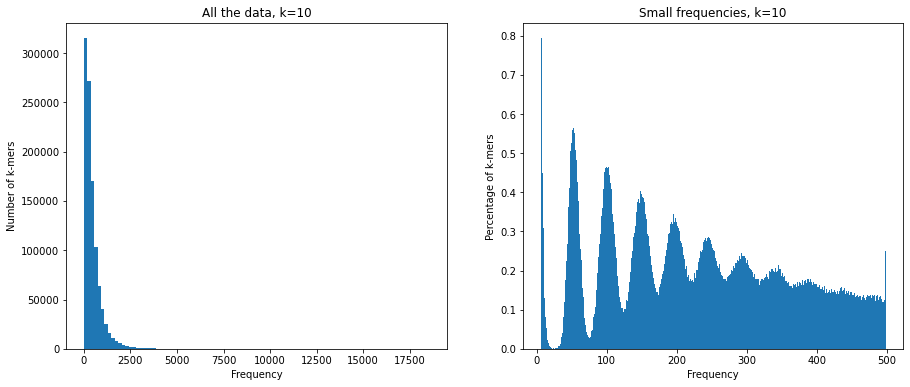

In [34]:
data = data_10.copy()
k = 10

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
plt.title('All the data, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Number of k-mers')
ax1.hist(data, bins=100);

ax2 = fig.add_subplot(122)
data = data[(data > 5) & (data < 500)]

plt.title('Small frequencies, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Percentage of k-mers')
x = range(5, 500)
ax2.hist(data, 
         weights=100 * np.ones(len(data)) / len(data),
         bins=x);

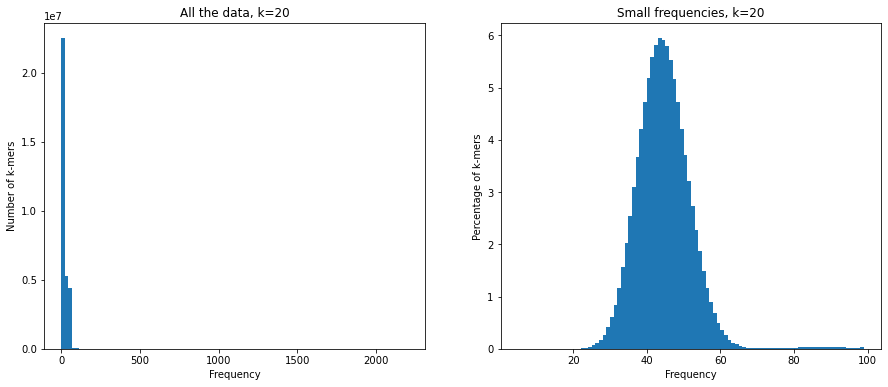

In [40]:
data = data_20.copy()
k = 20

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
plt.title('All the data, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Number of k-mers')
ax1.hist(data, bins=100);

ax2 = fig.add_subplot(122)
data = data[(data > 5) & (data < 200)]

plt.title('Small frequencies, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Percentage of k-mers')
x = range(5, 100)
ax2.hist(data, 
         weights=100 * np.ones(len(data)) / len(data),
         bins=x);

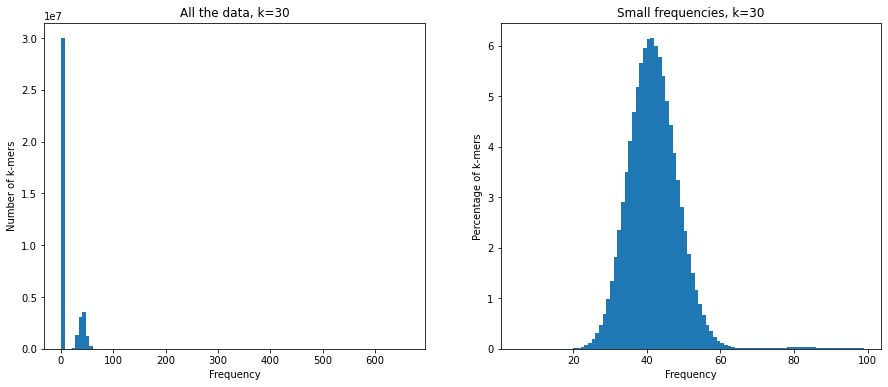

In [38]:
data = data_30.copy()
k = 30

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
plt.title('All the data, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Number of k-mers')
ax1.hist(data, bins=100);

ax2 = fig.add_subplot(122)
data = data[(data > 5) & (data < 200)]

plt.title('Small frequencies, k={}'.format(k))
plt.xlabel('Frequency')
plt.ylabel('Percentage of k-mers')
x = range(5, 100)
ax2.hist(data, 
         weights=100 * np.ones(len(data)) / len(data),
         bins=x);

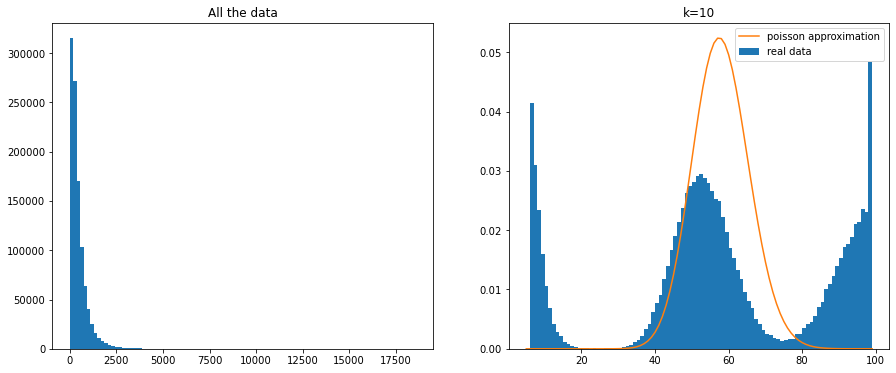

In [6]:
show(data_10, 10)

In [ ]:
data_35 = get_data(35)

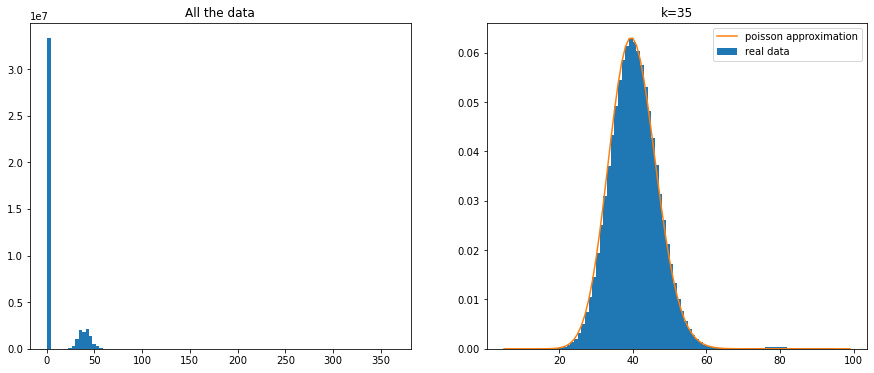

In [24]:
show(data_35, 35)

In [11]:
data_40 = get_data(40)

100%|██████████| 1993167/1993167 [15:47<00:00, 2103.10it/s] 


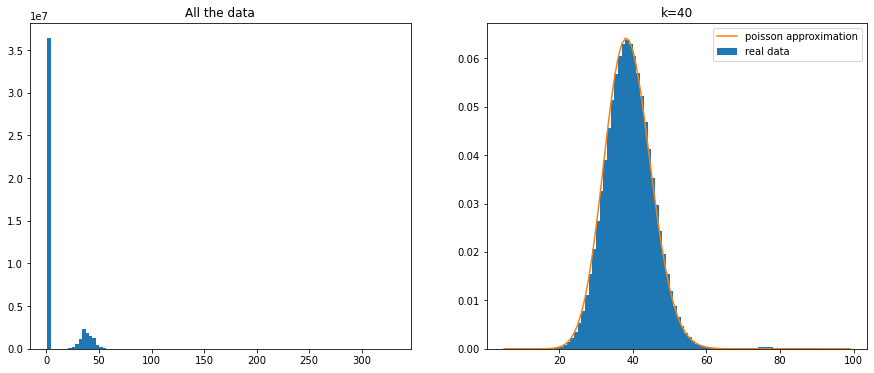

In [15]:
show(data_40, 40)

In [19]:
data_50 = get_data(50)

100%|██████████| 1993167/1993167 [13:35<00:00, 2443.10it/s] 


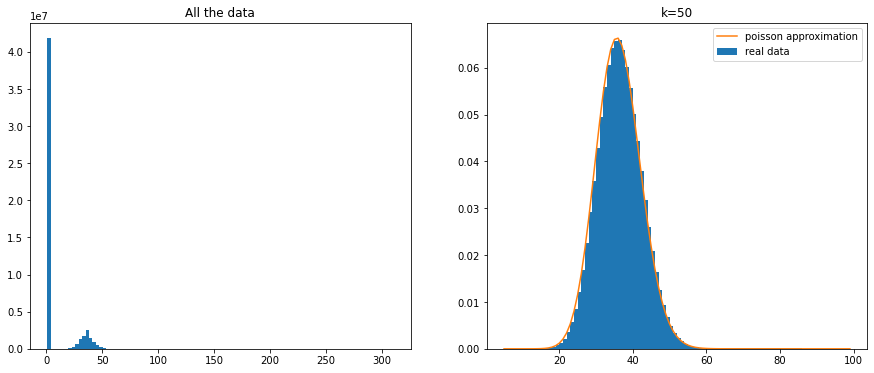

In [20]:
show(data_50, 50)

In [21]:
data_60 = get_data(60)

100%|██████████| 1993167/1993167 [08:15<00:00, 4018.84it/s]


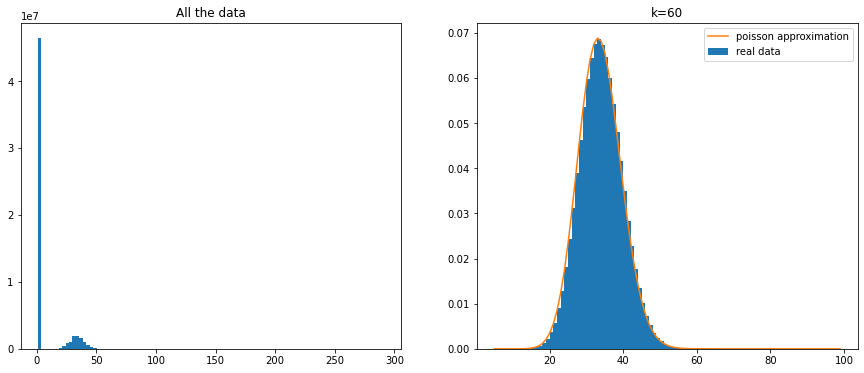

In [22]:
show(data_60, 60)

In [25]:
data_100 = get_data(100)

100%|██████████| 1993167/1993167 [11:49<00:00, 2809.42it/s] 


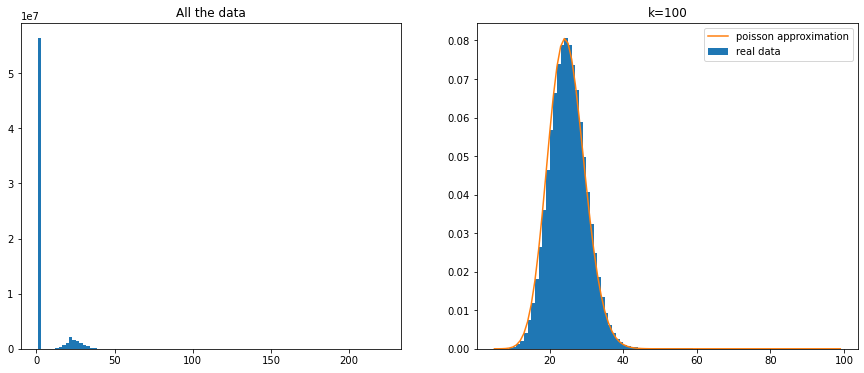

In [26]:
show(data_100, 100)